In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df_data=pd.read_csv("world-happiness-report-2021.csv")
df_data.head(149)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [187]:
df_data.columns
df_data.describe()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [188]:
df_data["Regional indicator"].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [189]:
sns.set_style("darkgrid")
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='#FFFFFF'

# Check Null value

In [190]:
df_data.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

# Plor b/w happpiness and GDP

Text(0, 0.5, 'GDP Per Capital ')

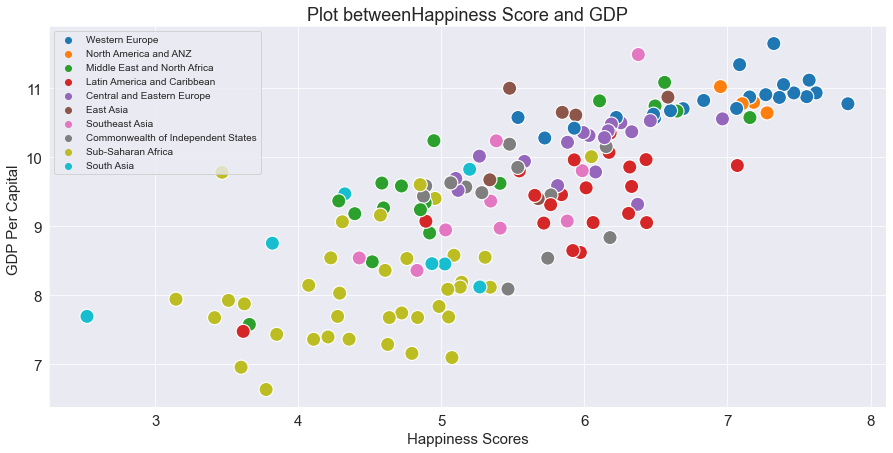

In [191]:
plt.figure(figsize=(15,7))
plt.title("Plot betweenHappiness Score and GDP")
# df_data.columns
sns.scatterplot(x=df_data['Ladder score'],y=df_data['Logged GDP per capita'],hue=df_data['Regional indicator'],s=(200))
plt.legend(loc='upper left',fontsize='10')
plt.xlabel("Happiness Scores")
plt.ylabel('GDP Per Capital ')

In [192]:
gdp_region=df_data.groupby('Regional indicator')['Logged GDP per capita'].sum()
print(gdp_region)

Regional indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: Logged GDP per capita, dtype: float64


Text(0, 0.5, '')

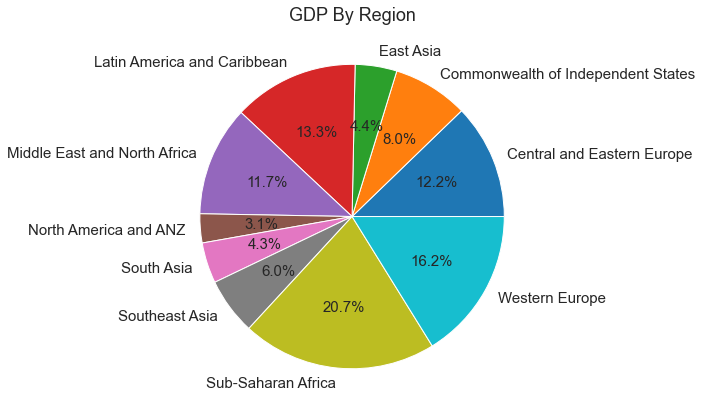

In [193]:
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title("GDP By Region")
plt.ylabel('')

# Total countries

In [194]:
total_country=df_data.groupby('Regional indicator')['Country name'].count()
print(total_country)

Regional indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: Country name, dtype: int64


Text(0, 0.5, '')

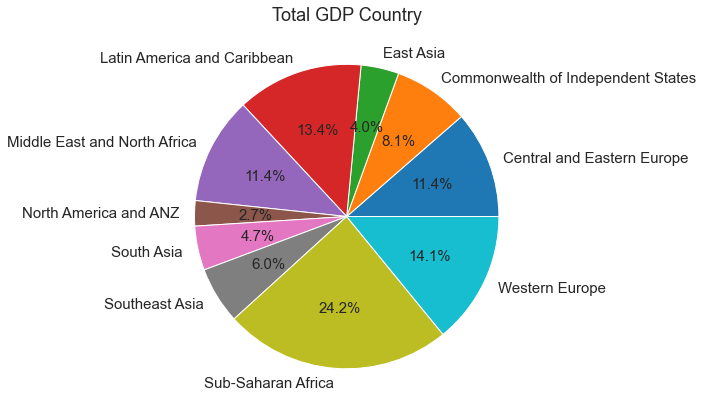

In [195]:
total_country.plot.pie(autopct='%1.1f%%')
plt.title("Total GDP Country")
plt.ylabel('')

# Corresation Map

C:\Users\ASUS\AppData\Local\Temp/ipykernel_21432/1079303820.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),cmap="Blues",square=True,ax=ax)


<AxesSubplot:>

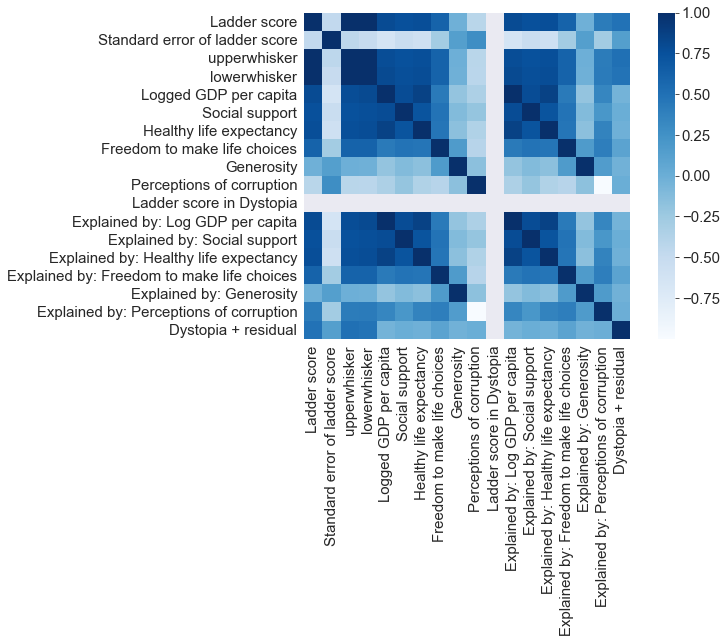

In [196]:
cor=df_data.corr(method="pearson")
f,ax=plt.subplots(figsize=(10,6))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),cmap="Blues",square=True,ax=ax)

# Corruption in regions

In [197]:
# data_columns=df_data[['Country name','Regional indicator','Ladder score','Perceptions of corruption']]
data=df_data[['Country name','Regional indicator','Ladder score','Perceptions of corruption','Healthy life expectancy']].copy()

# df_data.columns


In [198]:
sample=data.rename({'Country name':'country','Regional indicator':'regional','Ladder score':'happiness_score','Perceptions of corruption':'perception_of_corruption','Healthy life expectancy':'hle'},axis=1)
sample

,country,regional,happiness_score,perception_of_corruption,hle
0,Finland,Western Europe,7.842,0.186,72.000
1,Denmark,Western Europe,7.620,0.179,72.700
2,Switzerland,Western Europe,7.571,0.292,74.400
3,Iceland,Western Europe,7.554,0.673,73.000
4,Netherlands,Western Europe,7.464,0.338,72.400
...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.915,48.700
145,Botswana,Sub-Saharan Africa,3.467,0.801,59.269
146,Rwanda,Sub-Saharan Africa,3.415,0.167,61.400
147,Zimbabwe,Sub-Saharan Africa,3.145,0.821,56.201


In [199]:
corruption=sample.groupby('regional')['perception_of_corruption'].mean()
print(corruption)
# df_data.columns

regional
Central and Eastern Europe            0.850529
Commonwealth of Independent States    0.725083
East Asia                             0.683333
Latin America and Caribbean           0.792600
Middle East and North Africa          0.762235
North America and ANZ                 0.449250
South Asia                            0.797429
Southeast Asia                        0.709111
Sub-Saharan Africa                    0.765944
Western Europe                        0.523095
Name: perception_of_corruption, dtype: float64


AttributeError: 'Series' object has no attribute 'perception_of_corruption'

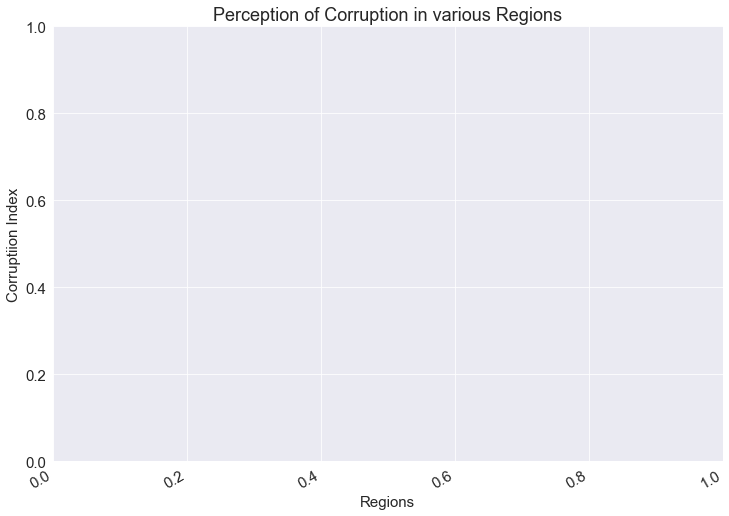

In [200]:
plt.rcParams['figure.figsize']=(12,8)
plt.title("Perception of Corruption in various Regions")
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Corruptiion Index',fontsize=15)
plt.xticks(rotation=30,ha='right')
plt.bar(corruption.index,corruption.perception_of_corruption)
# df_data.reset_index()

In [232]:
top_10=sample.head(10)
bottom_10=sample.head(10)
top_10

,country,regional,happiness_score,perception_of_corruption,hle
0,Finland,Western Europe,7.842,0.186,72.0
1,Denmark,Western Europe,7.620,0.179,72.7
2,Switzerland,Western Europe,7.571,0.292,74.4
3,Iceland,Western Europe,7.554,0.673,73.0
4,Netherlands,Western Europe,7.464,0.338,72.4
5,Norway,Western Europe,7.392,0.270,73.3
6,Sweden,Western Europe,7.363,0.237,72.7
7,Luxembourg,Western Europe,7.324,0.386,72.6
8,New Zealand,North America and ANZ,7.277,0.242,73.4
9,Austria,Western Europe,7.268,0.481,73.3


C:\Users\ASUS\AppData\Local\Temp/ipykernel_21432/4014860774.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation=45,ha='right')


TypeError: inner() got multiple values for argument 'ax'

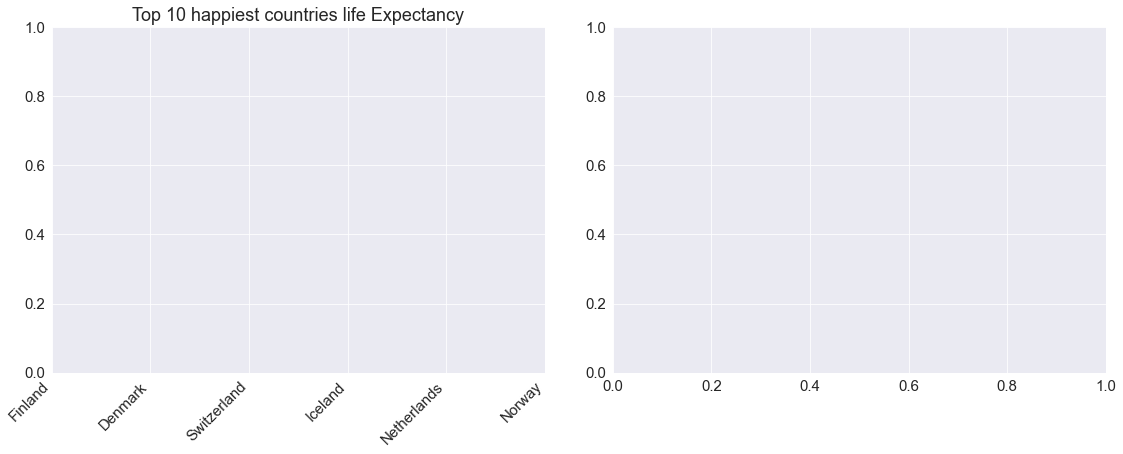

In [240]:
fig,axes=plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)
xlabels=top_10.country
axes[0].set_title('Top 10 happiest countries life Expectancy')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
plt.bar(top_10.country,top_10.perception_of_corruption,ax=0)
axes[0].set_xlabels('Country Name')
axes[0].set_ylabel('Life Expectancy')

xlabels=bottom_10['Country name']
axes[1].set_title('Bottom 10 happiest countries life Expectancy')
axes[1].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=bottom_10['Country name'],y=bottom_10['Healthy life expectancy'],ax=0)
axes[1].set_xlabels('Country Name')
axes[1].set_ylabel('Life Expectancy')


Text(0, 0.5, 'Happiness Score')

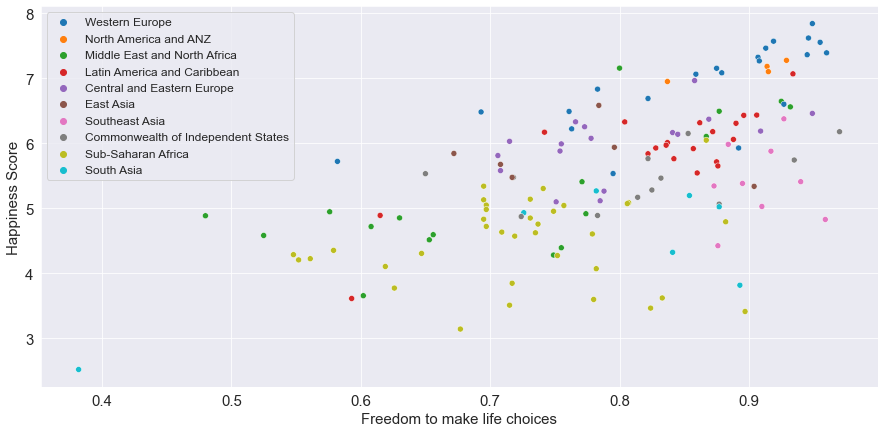

In [226]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=df_data['Freedom to make life choices'],y=df_data['Ladder score'],hue=df_data['Regional indicator'])
plt.legend(loc='upper left',fontsize='12')
plt.ylabel("Happiness Score")

<BarContainer object of 10 artists>

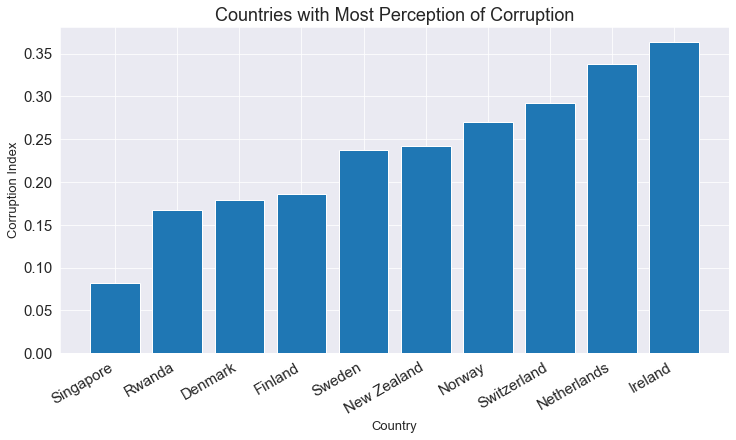

In [243]:
country=sample.sort_values(by='perception_of_corruption').head(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with Most Perception of Corruption')
plt.xlabel('Country',fontsize=13)
plt.ylabel('Corruption Index',fontsize=13)
plt.xticks(rotation=30,ha='right')
plt.bar(country.country,country.perception_of_corruption)

Text(0.5, 0, 'Happiness Score')

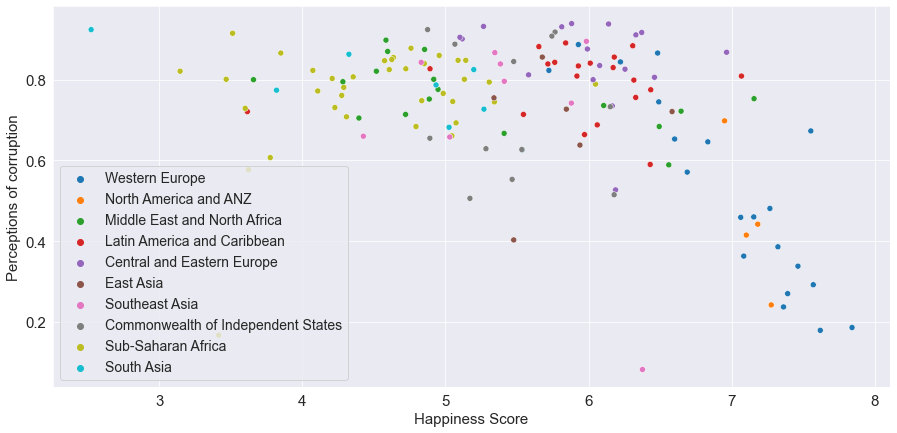

In [245]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=df_data['Ladder score'],y=df_data['Perceptions of corruption'],hue=df_data['Regional indicator'])
plt.legend(loc='lower left',fontsize='14')
plt.xlabel("Happiness Score")
